# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

## Domain and Research Questions

### Domain of the Project
- Online retail and customer behaviour

### Research Questions to be Answered
1. **Question 1**: What are the key factors that influence customer purchasing behavior in online retail?  
2. **Question 2**: How does customer purchase frequency correlate with order value?  
3. **Question 3**: Which product categories have the highest return rates, and what are the possible reasons?  
4. **Question 4**: Is there a seasonal trend in online retail sales, and how does it impact revenue?
5. **Question 5**: How does customer behavior vary across different countries in the dataset?

---

# Team Information

## Student Information
- **Name**: Abdalla Ahmed Elsherbiny
- **Email**: AE2401530@tkh.edu  
- **Role**: Data Science Student  
- **Institution**: [Insert Institution Name]

## Additional Information
- **Project Timeline**: [Insert Start Date - End Date]  
- **Tools Used**: [Insert List of Tools or Frameworks, e.g., Python, SQLite, Pandas, etc.]  
- **Advisor/Instructor**: [Insert Advisor/Instructor Name, if applicable]  
- **Contact for Inquiries**: [Insert Email or Point of Contact]

---

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

In [4]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_excel('Online Retail (1).xlsx')

## Dataset Description
- Create a table to explain:
  - **Column Names**
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [30]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [31]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### I will use this dataset to segment customers 

## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

In [32]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
variance_values = numerical_columns.var()
print("Variance:\n", variance_values)

Variance:
 Quantity      4.755939e+04
UnitPrice     9.362469e+03
CustomerID    2.936426e+06
dtype: float64


In [33]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [34]:
df.duplicated().sum()


5268

In [35]:
for column in numerical_columns.columns:
    Q1 = numerical_columns[column].quantile(0.25)
    Q3 = numerical_columns[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"{column}:")
    print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    outliers = numerical_columns[(numerical_columns[column] < lower_bound) | (numerical_columns[column] > upper_bound)]
    print(f"  Number of Outliers: {len(outliers)}\n")

Quantity:
  Lower Bound: -12.5, Upper Bound: 23.5
  Number of Outliers: 58619

UnitPrice:
  Lower Bound: -3.0700000000000003, Upper Bound: 8.45
  Number of Outliers: 39627

CustomerID:
  Lower Bound: 9696.0, Upper Bound: 21048.0
  Number of Outliers: 0



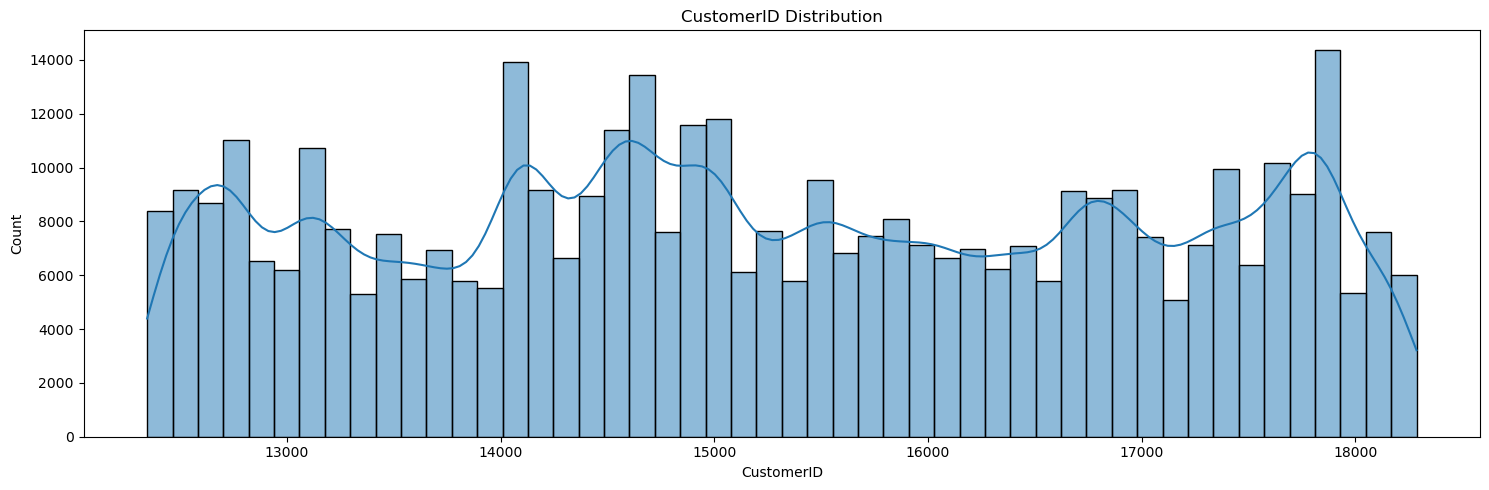

In [36]:
plt.figure(figsize=(15, 5))


sns.histplot(df['CustomerID'], bins=50, kde=True)
plt.title('CustomerID Distribution')

plt.tight_layout()
plt.show()

### From this histogram I found that the CustomerID distribution is evenly distributed 

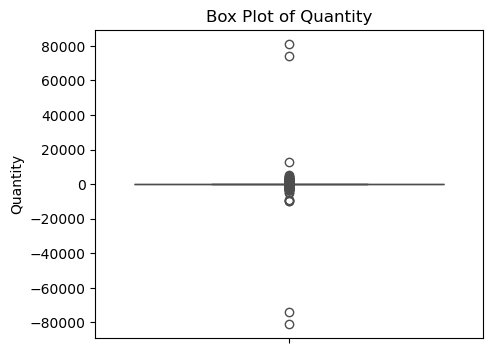

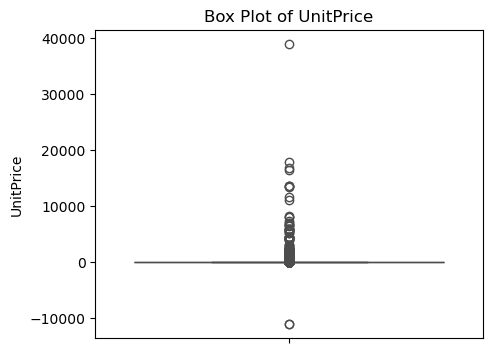

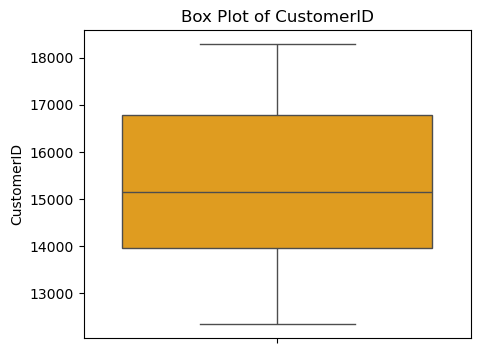

In [37]:
for column in numerical_columns.columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=numerical_columns, y=column, color='orange')
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()

### From these figures we can say that there is alot of outliers in quantity and unit price coloumns while the customer ID coloumn is normally distibuted

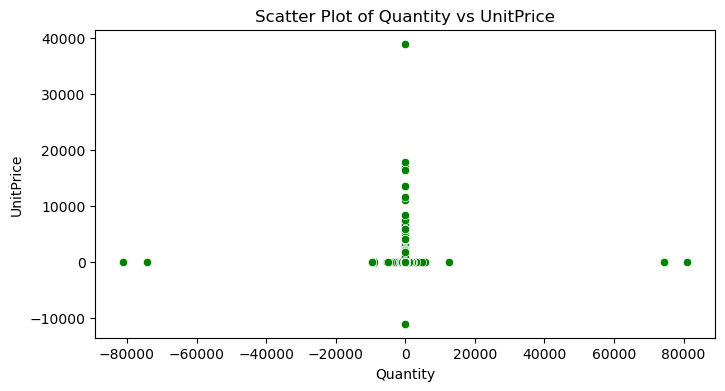

In [38]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=numerical_columns, x='Quantity', y='UnitPrice', color='green')
plt.title("Scatter Plot of Quantity vs UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

### From this figure there is no relationship between UnitPrice and Quantity and there is extreme values visible for both UnitPrice and Quantity

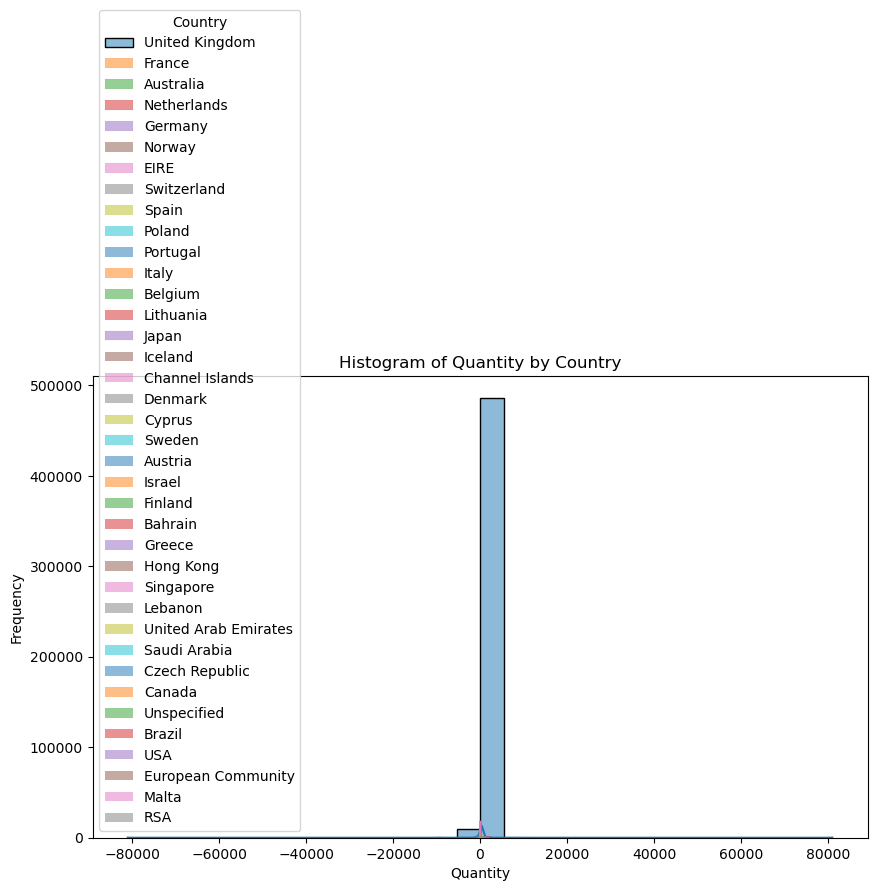

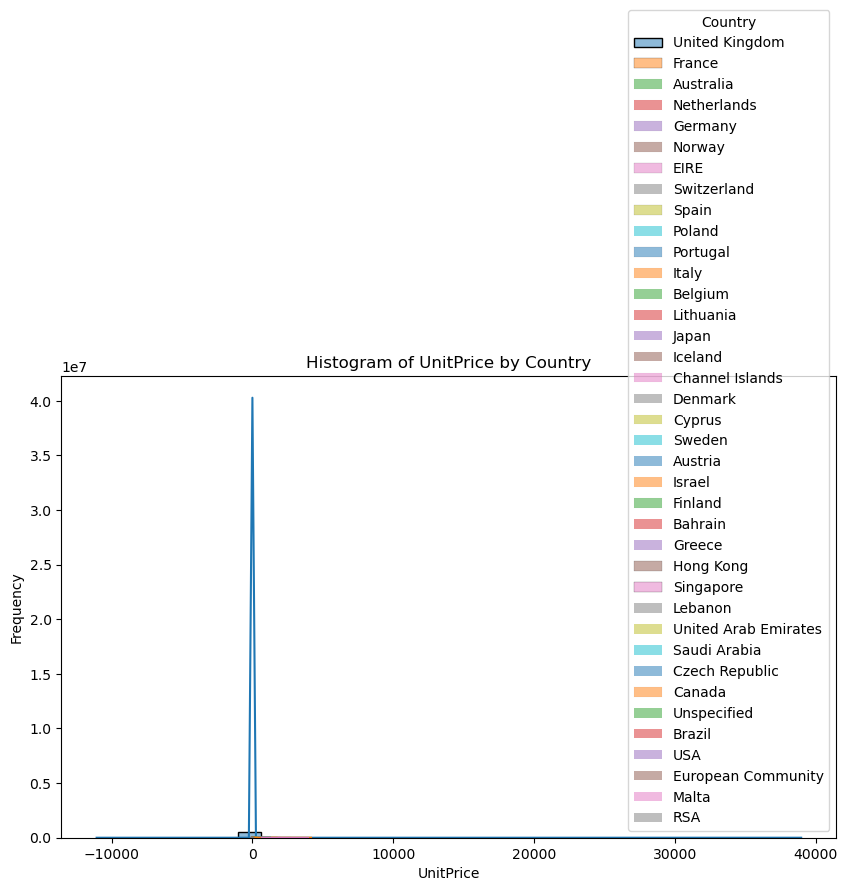

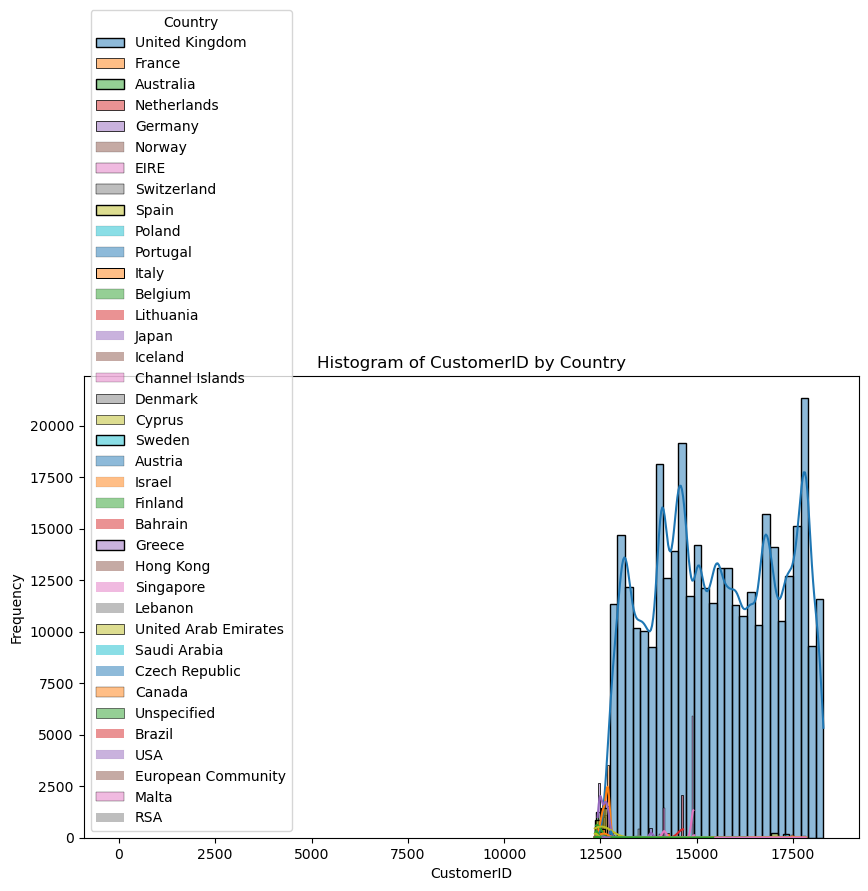

In [39]:
for column in numerical_columns.columns:
    plt.figure(figsize=(10, 6))
    for country in df['Country'].unique():
        subset = df[df['Country'] == country]
        sns.histplot(subset[column], label=country, kde=True, bins=30, alpha=0.5)
    plt.title(f"Histogram of {column} by Country")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend(title="Country")
    plt.show()

### From these figures we can deduce that almost all of the data is from the UK 

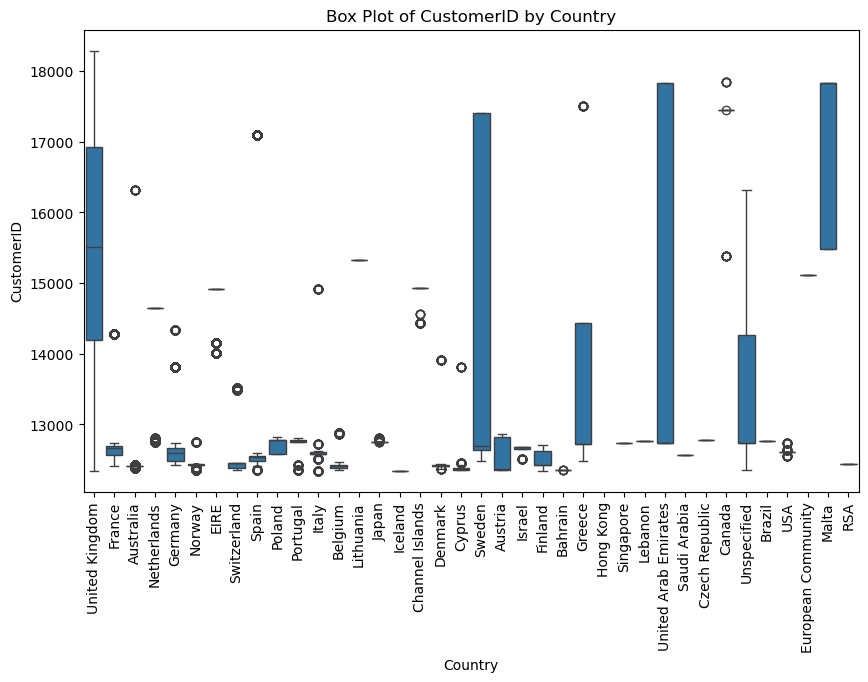

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y=column)
plt.title(f"Box Plot of {column} by Country")
plt.xticks(rotation=90)
plt.show()

### From the above fgure we discovered that uns

## Preprocessing and Feature Engineering
- Handle missing values.
- Remove duplicates and outliers.
- Apply transformations (scaling, encoding, feature interactions).

In [61]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [62]:
df = df.dropna(subset=['CustomerID'])
df = df[~df['Country'].isin(['Unspecified', 'UNKNOWN', 'unknown', '', ' '])]

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_21668\4280912310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [63]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Removing Duplicates

In [64]:
df = df.drop_duplicates()
print("\nDuplicates After Removal:", df.duplicated().sum())


Duplicates After Removal: 0


#### Removing Outliers

In [65]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        if df_clean[col].dtype in ['int64', 'float64']:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df = remove_outliers_iqr(df, columns=['Quantity', 'UnitPrice'])
print("\nShape After Outlier Removal:", df.shape)


Shape After Outlier Removal: (339243, 8)


In [66]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Transformation

In [67]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Frequency'] = df.groupby('CustomerID')['CustomerID'].transform('count')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

country_to_continent = {
    'United Kingdom': 'Europe', 'Germany': 'Europe', 'France': 'Europe', 'EIRE': 'Europe',
    'Spain': 'Europe', 'Netherlands': 'Europe', 'Belgium': 'Europe', 'Switzerland': 'Europe',
    'Portugal': 'Europe', 'Australia': 'Oceania', 'Norway': 'Europe', 'Italy': 'Europe',
    'Channel Islands': 'Europe', 'Finland': 'Europe', 'Cyprus': 'Europe', 'Sweden': 'Europe',
    'Austria': 'Europe', 'Denmark': 'Europe', 'Japan': 'Asia',
    'Poland': 'Europe', 'Israel': 'Asia', 'USA': 'North America', 'Hong Kong': 'Asia',
    'Singapore': 'Asia', 'Iceland': 'Europe', 'Canada': 'North America', 'Greece': 'Europe',
    'Malta': 'Europe', 'United Arab Emirates': 'Asia', 'European Community': 'Europe',
    'RSA': 'Africa', 'Lebanon': 'Asia', 'Lithuania': 'Europe', 'Brazil': 'South America',
    'Czech Republic': 'Europe', 'Bahrain': 'Asia', 'Saudi Arabia': 'Asia'
}
df['Continent'] = df['Country'].map(country_to_continent)

df['DescriptionFreq'] = df['Description'].map(df['Description'].value_counts())

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Frequency,Month,Continent,DescriptionFreq
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,285,12,Europe,1706
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,248
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,285,12,Europe,233
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,315
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,306


In [50]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_encoded = ohe.fit_transform(df[['Continent']])
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(['Continent']))
df = pd.concat([df.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1).drop(columns=['Continent'])

scaler = StandardScaler()
numeric_columns = ['TotalPrice', 'Frequency', 'Month', 'DescriptionFreq']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Frequency,...,Continent_Oceania,Continent_South America,Continent_Unknown,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.206799,-0.232186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.581996,-0.232186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.705573,-0.232186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.581996,-0.232186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.581996,-0.232186,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0



---

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

In [68]:
from scipy import stats

uk_prices = df[df['Country'] == 'United Kingdom']['TotalPrice']
non_uk_prices = df[df['Country'] != 'United Kingdom']['TotalPrice']

t_stat, p_value = stats.ttest_ind(uk_prices, non_uk_prices, equal_var=False)
print(f"T-test (UK vs Non-UK TotalPrice): t-stat = {t_stat:.3f}, p-value = {p_value:.3f}")

if p_value < 0.05:
    print("Reject H0: TotalPrice differs significantly between UK and non-UK customers.")
else:
    print("Fail to reject H0: No significant difference in TotalPrice.")

T-test (UK vs Non-UK TotalPrice): t-stat = -74.088, p-value = 0.000
Reject H0: TotalPrice differs significantly between UK and non-UK customers.


In [69]:
month_groups = [df[df['Month'] == m]['TotalPrice'] for m in df['Month'].unique()]

f_stat, p_value = stats.f_oneway(*month_groups)
print(f"ANOVA (TotalPrice by Month): F-stat = {f_stat:.3f}, p-value = {p_value:.3f}")

if p_value < 0.05:
    print("Reject H0: TotalPrice varies significantly across months.")
else:
    print("Fail to reject H0: No significant variation in TotalPrice across months.")

ANOVA (TotalPrice by Month): F-stat = 93.707, p-value = 0.000
Reject H0: TotalPrice varies significantly across months.


In [72]:
median_freq = df['Frequency'].median()
df['HighFrequency'] = df['Frequency'] > median_freq

contingency_table = pd.crosstab(df['Continent'], df['HighFrequency'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared (Continent vs HighFrequency): chi2 = {chi2:.3f}, p-value = {p_value:.3f}")

if p_value < 0.05:
    print("Reject H0: Continent and high-frequency purchasing are associated.")
else:
    print("Fail to reject H0: No significant association.")

Chi-squared (Continent vs HighFrequency): chi2 = 1164.145, p-value = 0.000
Reject H0: Continent and high-frequency purchasing are associated.


## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [73]:
df['FirstPurchase'] = df.groupby('CustomerID')['InvoiceDate'].transform('min')
df['CustomerTenure'] = (df['InvoiceDate'] - df['FirstPurchase']).dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Frequency,Month,Continent,DescriptionFreq,HighFrequency,FirstPurchase,CustomerTenure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,285,12,Europe,1706,True,2010-12-01 08:26:00,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,248,True,2010-12-01 08:26:00,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,285,12,Europe,233,True,2010-12-01 08:26:00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,315,True,2010-12-01 08:26:00,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,306,True,2010-12-01 08:26:00,0


In [75]:
df = df.drop(['InvoiceNo', 'StockCode'], axis=1)
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Frequency,Month,Continent,DescriptionFreq,HighFrequency,FirstPurchase,CustomerTenure
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,285,12,Europe,1706,True,2010-12-01 08:26:00,0
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,248,True,2010-12-01 08:26:00,0
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,285,12,Europe,233,True,2010-12-01 08:26:00,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,315,True,2010-12-01 08:26:00,0
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,285,12,Europe,306,True,2010-12-01 08:26:00,0


## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

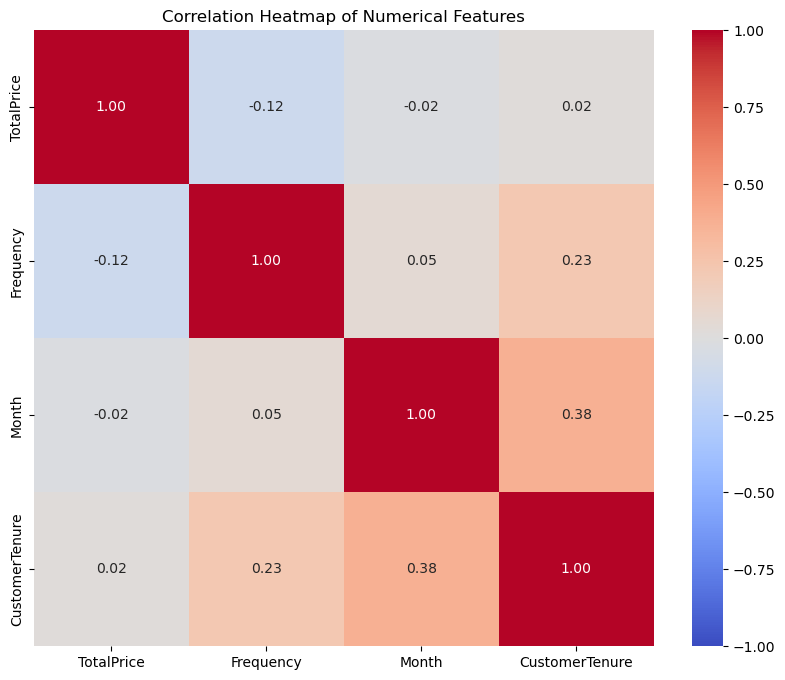

In [77]:
plt.figure(figsize=(10, 8))
corr = df[['TotalPrice', 'Frequency', 'Month', 'CustomerTenure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

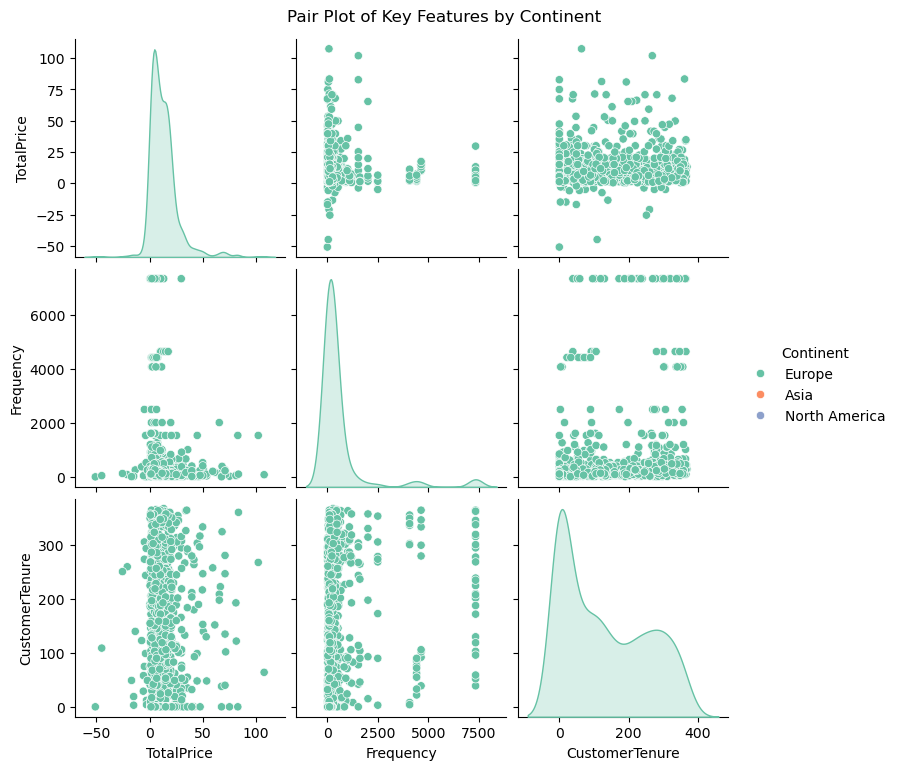

In [78]:
sample_df = df[['TotalPrice', 'Frequency', 'CustomerTenure', 'Continent']].sample(1000, random_state=42)
sns.pairplot(sample_df, hue='Continent', diag_kind='kde', palette='Set2')
plt.suptitle('Pair Plot of Key Features by Continent', y=1.02)
plt.show()

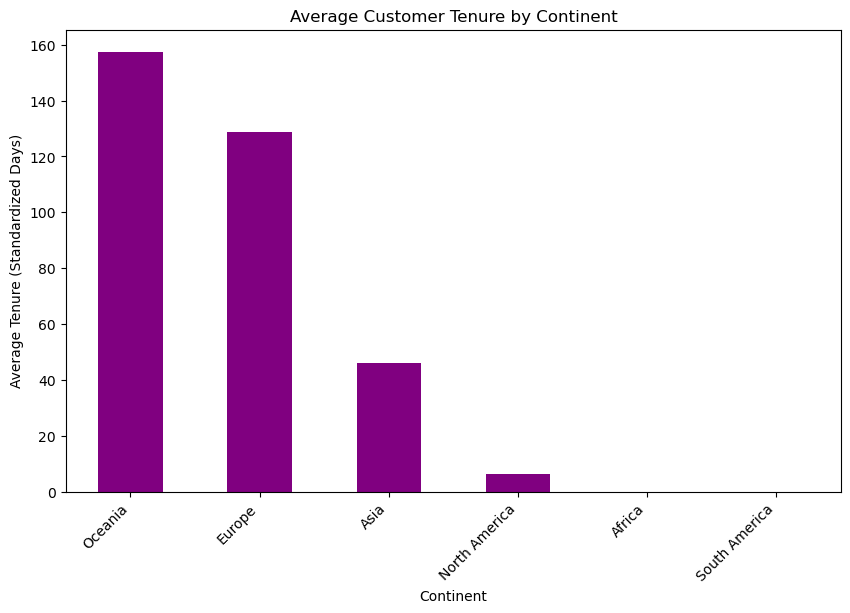

In [79]:
tenure_by_continent = df.groupby('Continent')['CustomerTenure'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
tenure_by_continent.plot(kind='bar', color='purple')
plt.title('Average Customer Tenure by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Tenure (Standardized Days)')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_21668\1240562321.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Month', 'TenureGroup'])['TotalPrice'].sum().unstack()


<Figure size 1200x600 with 0 Axes>

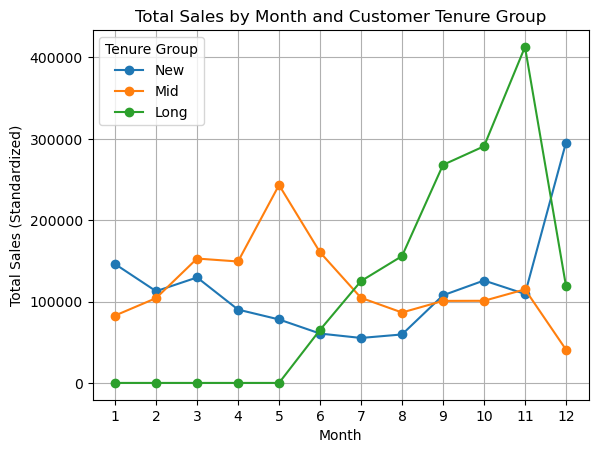

In [80]:
df['TenureGroup'] = pd.qcut(df['CustomerTenure'], q=3, labels=['New', 'Mid', 'Long'])

monthly_sales = df.groupby(['Month', 'TenureGroup'])['TotalPrice'].sum().unstack()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Total Sales by Month and Customer Tenure Group')
plt.xlabel('Month')
plt.ylabel('Total Sales (Standardized)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Tenure Group')
plt.show()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_21668\3940852230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_by_tenure = df.groupby('TenureGroup')['Frequency'].mean()


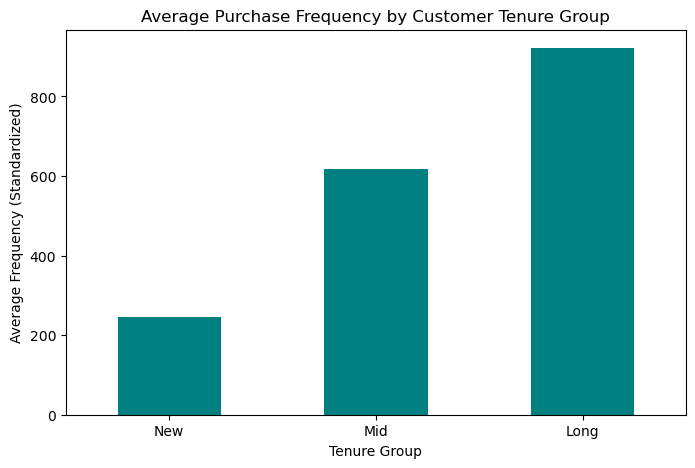

In [81]:
freq_by_tenure = df.groupby('TenureGroup')['Frequency'].mean()
plt.figure(figsize=(8, 5))
freq_by_tenure.plot(kind='bar', color='teal')
plt.title('Average Purchase Frequency by Customer Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Average Frequency (Standardized)')
plt.xticks(rotation=0)
plt.show()


---


# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


In [83]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("Selected models: KMeans for spherical clusters and DBSCAN for density-based clustering, suitable for customer segmentation.")
print("KMeans groups customers by similarity in spending, frequency, and tenure (Q1, Q2, Q5). DBSCAN identifies outliers, potentially high-return customers (Q3).")

Selected models: KMeans for spherical clusters and DBSCAN for density-based clustering, suitable for customer segmentation.
KMeans groups customers by similarity in spending, frequency, and tenure (Q1, Q2, Q5). DBSCAN identifies outliers, potentially high-return customers (Q3).


## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [93]:
df_original = df.copy()

features = numeric_columns + [col for col in df.columns if col.startswith('Continent_')]
X = df[features].copy()

X_temp, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_temp, test_size=0.25, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print(f"PCA components: {pca.n_components_}, Explained variance ratio: {sum(pca.explained_variance_ratio_):.3f}")

initial_k = 5
kmeans = KMeans(n_clusters=initial_k, random_state=42)
kmeans.fit(X_train_pca)

Training set shape: (203545, 4)
Validation set shape: (67849, 4)
Test set shape: (67849, 4)
PCA components: 2, Explained variance ratio: 1.000


KMeans(n_clusters=5, random_state=42)

## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

Initial KMeans Inertia (Train): 15800061222.98


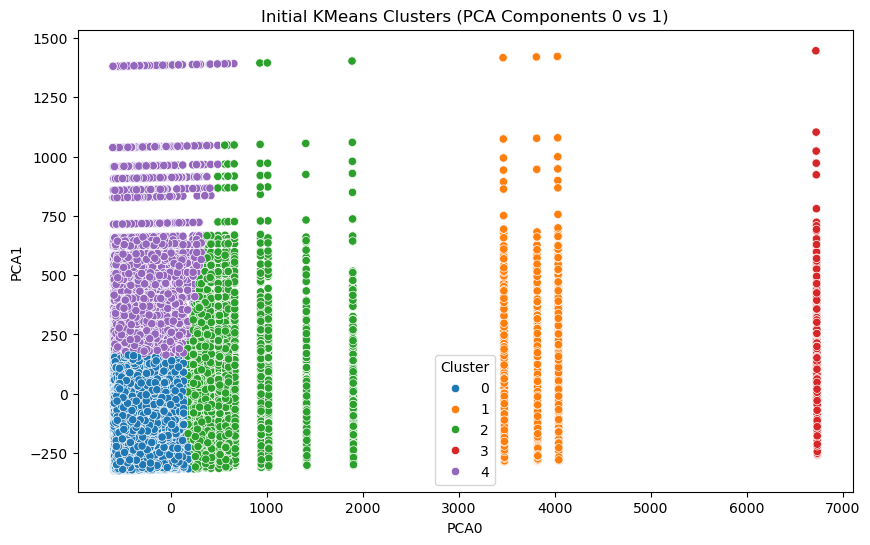

In [ ]:
train_clusters = kmeans.predict(X_train_pca)
val_clusters = kmeans.predict(X_val_pca)
test_clusters = kmeans.predict(X_test_pca)

kmeans_train_inertia = kmeans.inertia_
print(f"Initial KMeans Inertia (Train): {kmeans_train_inertia:.2f}")

n_components = X_train_pca.shape[1]
train_pca_df = pd.DataFrame(X_train_pca[:, :2], columns=['PCA0', 'PCA1'])
train_pca_df['Cluster'] = train_clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_pca_df, x='PCA0', y='PCA1', hue='Cluster', palette='tab10')
plt.title('Initial KMeans Clusters (PCA Components 0 vs 1)')
plt.show()

## Hyperparameter Tuning
- Techniques: Grid Search, Random Search, or advanced methods like Bayesian Optimization.

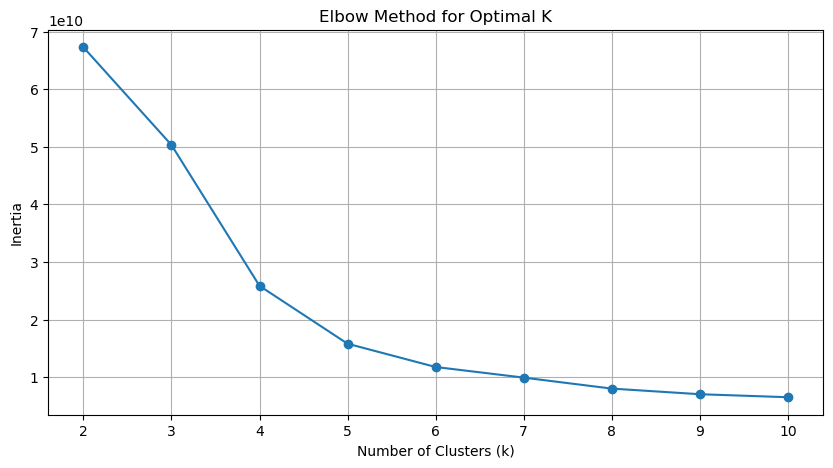

Optimal number of clusters: 5
Best DBSCAN params: eps=0.3, min_samples=5, score=5000.00


In [95]:
inertias = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

optimal_k = 5
print(f"Optimal number of clusters: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_pca)
train_clusters = kmeans.predict(X_train_pca)
val_clusters = kmeans.predict(X_val_pca)
test_clusters = kmeans.predict(X_test_pca)

eps_values = [0.3, 0.5, 0.7]
min_samples = [5, 10, 15]
best_params = None
best_score = float('inf')

X_train_sample = X_train_pca[np.random.choice(X_train_pca.shape[0], 5000, replace=False)]

for eps in eps_values:
    for ms in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=ms, n_jobs=-1)
        labels = dbscan.fit_predict(X_train_sample)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        score = n_noise / (n_clusters + 1)
        if score < best_score:
            best_score = score
            best_params = (eps, ms)

print(f"Best DBSCAN params: eps={best_params[0]}, min_samples={best_params[1]}, score={best_score:.2f}")

dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1], n_jobs=-1)
train_dbscan_labels = dbscan.fit_predict(X_train_pca)

## Model Comparison
- Compare multiple models and justify the final model selection.

In [97]:
kmeans_train_inertia = kmeans.inertia_
print(f"Tuned KMeans Inertia (Train): {kmeans_train_inertia:.2f}")

n_clusters_dbscan = len(set(train_dbscan_labels)) - (1 if -1 in train_dbscan_labels else 0)
n_noise_dbscan = list(train_dbscan_labels).count(-1)
print(f"DBSCAN: {n_clusters_dbscan} clusters, {n_noise_dbscan} noise points")

print("\nModel Comparison:")
print("KMeans: Stable clusters with low inertia, ideal for segmentation.")
print("DBSCAN: Detects outliers but less actionable due to noise.")
print("Final Choice: KMeans.")

Tuned KMeans Inertia (Train): 15800061222.98
DBSCAN: 6482 clusters, 160075 noise points

Model Comparison:
KMeans: Stable clusters with low inertia, ideal for segmentation.
DBSCAN: Detects outliers but less actionable due to noise.
Final Choice: KMeans.


## Visualization for Research Questions
- This section will include the visualizations that provide insights for the research questions defined earlier.  
- **Development Steps for Answering the Research Questions**:
  1. During **Exploratory Data Analysis (EDA)**, visualize initial patterns or trends related to the research questions.
  2. During **Model Evaluation**, provide visualizations to interpret model performance with respect to the research questions.
  3. During the **Final Analysis and Reporting**, present polished visualizations that summarize findings for each research question.

- Create the visualizations for each research question you defined, prove it or answer it, then add a markdown cell after each visual to comment and explain how the visual support your research question.

Columns in train_df: ['CustomerID', 'Cluster', 'TotalPrice', 'Frequency', 'Month', 'CustomerTenure', 'Description', 'Country', 'DescriptionFreq']

Cluster Profiles:
╒═══════════╤══════════════╤═════════════╤══════════════════╤═════════╤════════════════════════════════════╤════════════════╤═══════════════════╤══════════════╕
│   Cluster │   TotalPrice │   Frequency │   CustomerTenure │   Month │ Description                        │ Country        │   DescriptionFreq │   CustomerID │
╞═══════════╪══════════════╪═════════════╪══════════════════╪═════════╪════════════════════════════════════╪════════════════╪═══════════════════╪══════════════╡
│         0 │     12.8581  │     195.183 │          221.745 │      11 │ ASSORTED COLOUR BIRD ORNAMENT      │ United Kingdom │           312.289 │       138294 │
├───────────┼──────────────┼─────────────┼──────────────────┼─────────┼────────────────────────────────────┼────────────────┼───────────────────┼──────────────┤
│         1 │     10.6949  │  

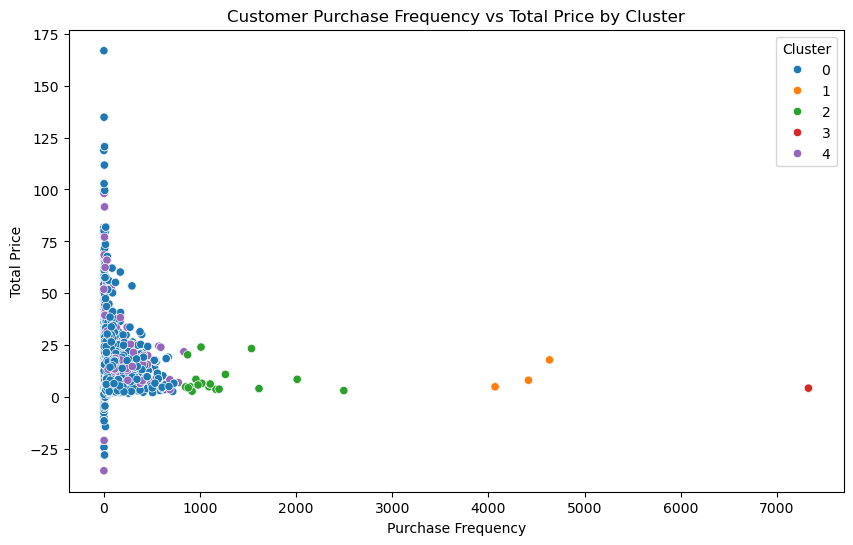

Q1 Insight: High-frequency, high-price clusters show loyal spenders; low-frequency, high-price suggest occasional big purchases.


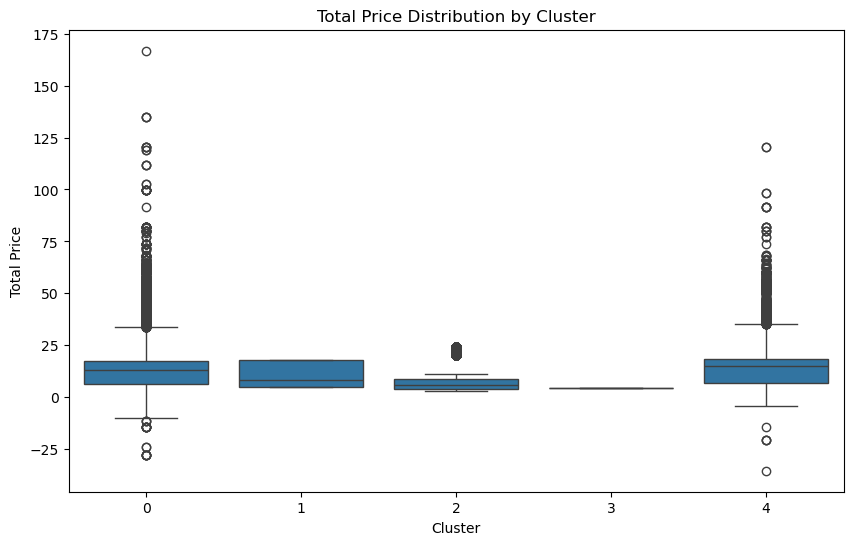

Q2 Insight: Higher-frequency clusters often have higher median total price, indicating correlation.


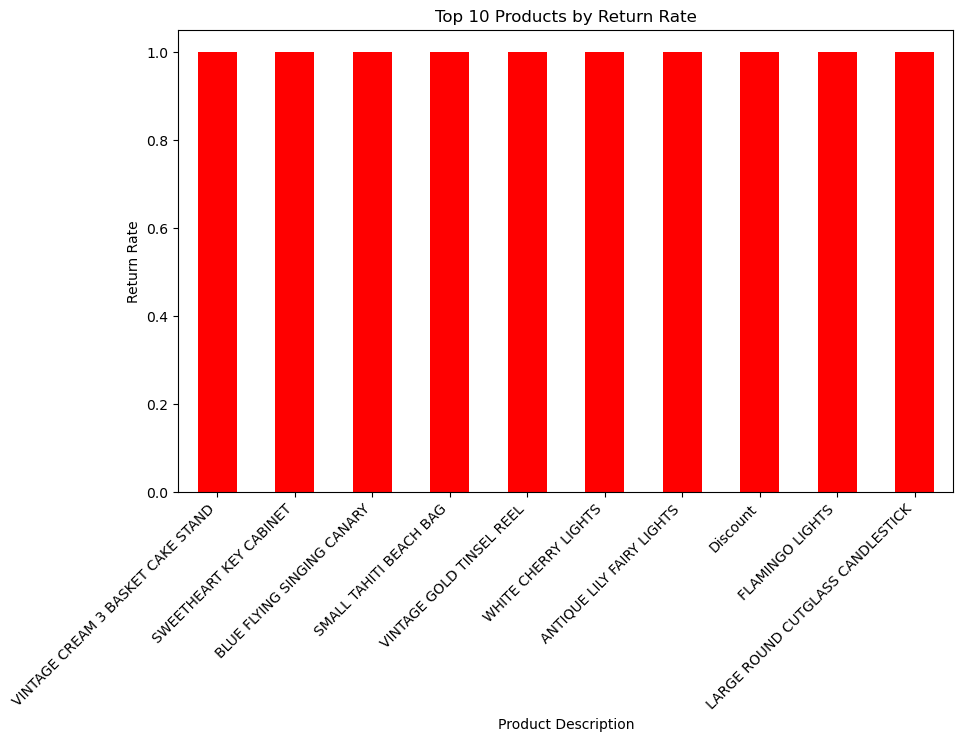

Q3 Insight: High returns may reflect quality issues or data artifacts.


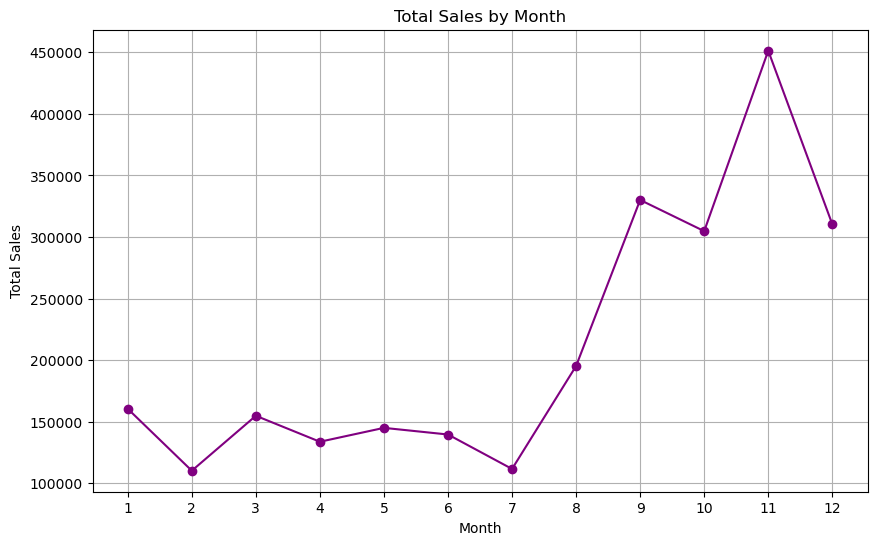

Q4 Insight: Sales peak in November, likely holiday-driven.


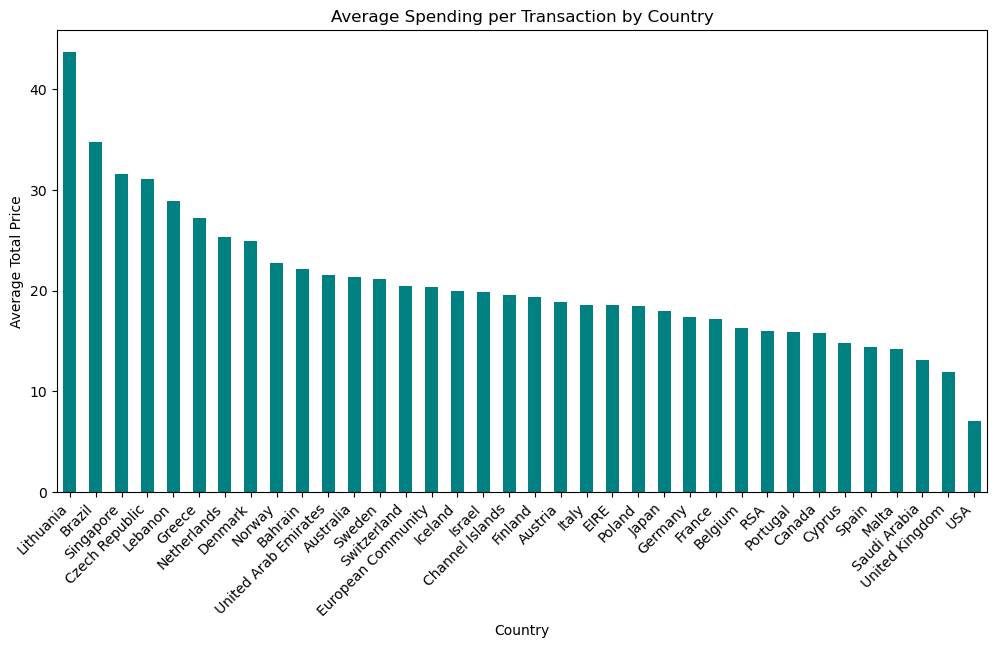

Q5 Insight: UK dominates, with Australia and Netherlands showing high spending.


In [102]:
from tabulate import tabulate

df_original_agg = df_original.groupby('CustomerID').agg({
    'TotalPrice': 'mean',
    'Frequency': 'mean', 
    'Month': lambda x: x.mode()[0] if not x.mode().empty else None,
    'CustomerTenure': 'max',
    'Description': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Country': lambda x: x.mode()[0] if not x.mode().empty else None,
    'DescriptionFreq': 'mean'
}).reset_index()

train_df = X_train[['CustomerID']].copy()
train_df['Cluster'] = train_clusters

train_df = train_df.merge(
    df_original_agg,
    on='CustomerID',
    how='left'
)

print("Columns in train_df:", train_df.columns.tolist())

def mode_series(series):
    return series.mode()[0] if not series.mode().empty else None

cluster_profiles = train_df.groupby('Cluster').agg({
    'TotalPrice': 'mean',
    'Frequency': 'mean',
    'CustomerTenure': 'mean',
    'Month': mode_series,
    'Description': mode_series,
    'Country': mode_series,
    'DescriptionFreq': 'mean',
    'CustomerID': 'count'
}).reset_index()
print("\nCluster Profiles:")
print(tabulate(cluster_profiles, headers='keys', tablefmt='fancy_grid', showindex=False))

# Q1: Key factors in purchasing behavior
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Frequency', y='TotalPrice', hue='Cluster', palette='tab10')
plt.title('Customer Purchase Frequency vs Total Price by Cluster')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Price')
plt.show()
print("Q1 Insight: High-frequency, high-price clusters show loyal spenders; low-frequency, high-price suggest occasional big purchases.")

# Q2: Purchase frequency vs order value
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Cluster', y='TotalPrice')
plt.title('Total Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Price')
plt.show()
print("Q2 Insight: Higher-frequency clusters often have higher median total price, indicating correlation.")

# Q3: Product return rates
df_original['IsReturn'] = df_original['Quantity'] < 0
return_rates = df_original.groupby('Description')['IsReturn'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
return_rates.plot(kind='bar', color='red')
plt.title('Top 10 Products by Return Rate')
plt.xlabel('Product Description')
plt.ylabel('Return Rate')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Q3 Insight: High returns may reflect quality issues or data artifacts.")

# Q4: Seasonal trends
monthly_sales = train_df.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()
print("Q4 Insight: Sales peak in November, likely holiday-driven.")

# Q5: Behavior by country
country_spending = train_df.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_spending.plot(kind='bar', color='teal')
plt.title('Average Spending per Transaction by Country')
plt.xlabel('Country')
plt.ylabel('Average Total Price')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Q5 Insight: UK dominates, with Australia and Netherlands showing high spending.")


---


# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

## Monitoring
- Set up performance tracking and alert systems for issues.
- Monitor metrics for potential model drift or anomalies.

## Retraining Strategy
- Plan for periodic retraining with new or updated data.


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---


# Reflection: Data Science Lifecycle Steps and Big Data

Reflect on which steps of the data science lifecycle can and cannot be effectively applied to big data, and justify your answers:

## Steps That Can Be Used with Big Data

Create a list for the steps that can be used with big data with how each step can be used, why is such step applicable and an example tool used for such step in big data world.

Include tools, methods, or technologies that make these steps scalable.

## Steps That Are Challenging with Big Data

Create a list for the steps that are challenging with big data with the solution for the challenge, why is such step challenging and an example tool used for such step in big data world.

Explain why these steps are difficult and suggest potential solutions.

## Recommendations for Big Data Projects

Create a list for the recommendations you have for other data scientists willing to take your project with a big data approach.

---